<h2 style="background-color:#101820FF;font-family:newtimeroman;font-size:180%;border-radius: 5px 5px;color:#FEE715FF">Import</h2>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

from xgboost import XGBClassifier

In [1]:
data=pd.read_excel("C:/Users/ac/OneDrive/Desktop/Projects/Project 10/Date_Fruit_Datasets.xlsx")

df = data.copy()

<IPython.core.display.Javascript object>

<h2 style="background-color:#101820FF;font-family:newtimeroman;font-size:180%;border-radius: 5px 5px;color:#FEE715FF">First Look at The Dataset</h2>

In [3]:
def InfoData(dataframe,target_variable = None):
    
    print(f"""
== DATA INFO ==
* Shape: {dataframe.shape}
* Number of data = {dataframe.shape[0]}


== COLUMNS INFO ==
* Number of columns: {len(dataframe.columns)}
* Columns with dtype: 
{dataframe.dtypes}


== Missing / Nan Values ==
* Is there any missing value?: {dataframe.isnull().values.any()}
    """)
    
    if (target_variable != None) and (target_variable in dataframe.columns):    
        
        print(f"""
== TARGET VARIABLE ==

* Variable: {target_variable}
* Values of Variable: {" - ".join(df.Class.unique())}
* Count of Values: {len(df.Class.unique())}
""")
        
        
        
    elif (target_variable != None) and (target_variable not in dataframe.columns): 
        print("Please type correctly your target variable")
        

In [4]:
InfoData(df,"Class")


== DATA INFO ==
* Shape: (898, 35)
* Number of data = 898


== COLUMNS INFO ==
* Number of columns: 35
* Columns with dtype: 
AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             objec

In [5]:
for i in df.columns[:-1]: # I dont want to / can not see last column("Class") because it is target variable and it is an object
    print(f"{i}: | Min: {df[i].min():.4f} | Max: {df[i].max():.4f} | Std: {df[i].std():.4f} | Mean: {(df[i].mean()):.4f}")

AREA: | Min: 1987.0000 | Max: 546063.0000 | Std: 107245.2053 | Mean: 298295.2071
PERIMETER: | Min: 911.8280 | Max: 2811.9971 | Std: 410.0125 | Mean: 2057.6610
MAJOR_AXIS: | Min: 336.7227 | Max: 1222.7230 | Std: 144.0593 | Mean: 750.8120
MINOR_AXIS: | Min: 2.2832 | Max: 766.4536 | Std: 114.2689 | Mean: 495.8728
ECCENTRICITY: | Min: 0.3448 | Max: 1.0000 | Std: 0.0887 | Mean: 0.7375
EQDIASQ: | Min: 50.2984 | Max: 833.8279 | Std: 119.5939 | Mean: 604.5779
SOLIDITY: | Min: 0.8366 | Max: 0.9974 | Std: 0.0182 | Mean: 0.9818
CONVEX_AREA: | Min: 2257.0000 | Max: 552598.0000 | Std: 108815.6569 | Mean: 303845.5924
EXTENT: | Min: 0.5123 | Max: 0.8562 | Std: 0.0537 | Mean: 0.7363
ASPECT_RATIO: | Min: 1.0653 | Max: 535.5257 | Std: 17.8208 | Mean: 2.1311
ROUNDNESS: | Min: 0.0048 | Max: 0.9773 | Std: 0.0708 | Mean: 0.8577
COMPACTNESS: | Min: 0.0411 | Max: 0.9681 | Std: 0.0622 | Mean: 0.8072
SHAPEFACTOR_1: | Min: 0.0017 | Max: 0.6154 | Std: 0.0205 | Mean: 0.0034
SHAPEFACTOR_2: | Min: 0.0011 | Max: 0.00

<h2 style="background-color:#101820FF;font-family:newtimeroman;font-size:180%;border-radius: 5px 5px;color:#FEE715FF">Preprocessing</h2>

In [6]:
le = LabelEncoder()
target = df['Class']
target = le.fit_transform(target)

In [7]:
X = df.drop("Class",axis=1)

In [8]:
train_test_split_params = {"test_size":0.33,
                        "random_state":1}

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, target,
                                                    test_size=train_test_split_params["test_size"],
                                                    random_state=train_test_split_params["random_state"],
                                                    shuffle=True)

In [10]:
print(f"""
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}
""")


X_train shape: (601, 34)
X_test shape: (297, 34)
y_train shape: (601,)
y_test shape: (297,)



<h2 style="background-color:#101820FF;font-family:newtimeroman;font-size:180%;border-radius: 5px 5px;color:#FEE715FF">Model</h2>

#### Notes:
##### * I will use "RandomizeGridSearch" to select parameters
##### * I will use "StratifiedKFold" because we are dealing with imbalanced class distributions. (You can see below)

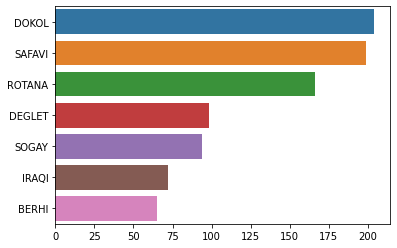

In [11]:
sns.barplot(y=df["Class"].value_counts().index,x=df["Class"].value_counts().values);

In [12]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'eval_metric': ["mlogloss"],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [0, 3, 4]
        }

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)

randomized_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=5, cv=skf.split(X_train,y_train), verbose=3, random_state=1)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, eval_metric=mlogloss, gamma=2, learning_rate=0.01, max_depth=0, min_child_weight=10, subsample=1.0;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=1.5, learning_rate=0.1, max_depth=4, min_child_weigh

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py", line 1411, in fit
    callbacks=callbacks,
  File "/opt/conda/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(*

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7ffaf87db2d0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_c...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                      

In [14]:
print('Best hyperparameters:', randomized_search.best_params_)

Best hyperparameters: {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1.5, 'eval_metric': 'mlogloss', 'colsample_bytree': 0.6}


In [15]:
xgb = XGBClassifier(subsample = randomized_search.best_params_["subsample"],
                      min_child_weight = randomized_search.best_params_["min_child_weight"],
                      max_depth = randomized_search.best_params_["max_depth"],
                      learning_rate = randomized_search.best_params_["learning_rate"],
                      gamma = randomized_search.best_params_["gamma"],
                      eval_metric = randomized_search.best_params_["eval_metric"],
                      colsample_bytree = randomized_search.best_params_["colsample_bytree"])

In [16]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [17]:
train_pred = xgb.predict(X_train)
train_acc = accuracy_score(y_train,train_pred)
print('Train Accuracy: ', train_acc)
 
test_pred = xgb.predict(X_test)
test_acc = accuracy_score(y_test,test_pred)
print('Test Accuracy:', test_acc)


Train Accuracy:  0.9850249584026622
Test Accuracy: 0.8686868686868687


<h2 style="background-color:#101820FF;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;color:#FEE715FF">What's Next?</h2>

* Model can be optimized with different hyperparameters.
* A better result can be obtained with AutoML.
* Apart from Accuracy, other metrics should also be checked.

You can do the above by using this notebook instead of leaving comments like "okay, good, can be improved" etc. by looking at this notebook.
Let's get into action! Have Fun!
If you have any questions or ideas, please do not forget to write a comment.